In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
density = 1850  # kg/m³ (SiO2)
kB = 1.380649e-23 # J/K
R = 75e-9  # particle radius (m)
T = 297 # K
Pressure_atm = 1013.25 #mbar (=1 atm)
Pressure = (Pressure_atm)
eta_air = 18.27e-6 # Pa # (J.T.R.Watson (1995)).
d_gas = 0.372e-9 #m #(Sone (2007)), ρSiO2
volume = (4/3) * np.pi * (R**3)
m = density * volume  # kg

In [24]:
def Gamma_env(Pressure_mbar):
    def mfp(P_gas):
        mfp_val = kB*T/(2**0.5*np.pi*d_gas**2*P_gas)
        return mfp_val
    
    Pressure_pascals = 100*Pressure_mbar
    s = mfp(Pressure_pascals)
    K_n = s/R
    c_K = 0.31*K_n/(0.785 + 1.152*K_n + K_n**2)
    gamma = 6*np.pi*eta_air*R/m * 0.619/(0.619 + K_n) * (1+c_K)
    return gamma #Isso está em Hz

In [25]:
k_spring=m*(2*np.pi*50_000)**2

N = 500_000
dt = 1e-8
t = np.linspace(0,dt*N,N)
gamma_hz = Gamma_env(Pressure)

In [26]:
def dx_dt(v):
    return v

def dv_dt(pos,v):
    return - k_spring*pos/m - gamma_hz*v

In [27]:
def runge_kutta(v_init, pos_init):
    positions = np.zeros(len(t))
    velocities = np.zeros(len(t))
    
    positions[0] = pos_init
    velocities[0] = v_init 

    for i in range(len(t) - 1):
        k1_pos = velocities[i] * dt
        k1_v = dv_dt(positions[i], velocities[i]) * dt
        
        k2_pos = (velocities[i] + 0.5 * k1_v) * dt
        k2_v = dv_dt(positions[i] + 0.5 * k1_pos, velocities[i] + 0.5 * k1_v) * dt
        
        k3_pos = (velocities[i] + 0.5 * k2_v) * dt
        k3_v = dv_dt(positions[i] + 0.5 * k2_pos, velocities[i] + 0.5 * k2_v) * dt
        
        k4_pos = (velocities[i] + k3_v) * dt
        k4_v = dv_dt(positions[i] + k3_pos, velocities[i] + k3_v) * dt
        
        positions[i + 1] = positions[i] + (1 / 6) * (k1_pos + 2 * k2_pos + 2 * k3_pos + k4_pos)
        velocities[i + 1] = velocities[i] + (1 / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
        
        thermal_noise = np.sqrt(2 * kB * T * gamma_hz * m) * np.random.normal() * np.sqrt(dt) / m
        velocities[i + 1] += thermal_noise
        
    return positions, velocities

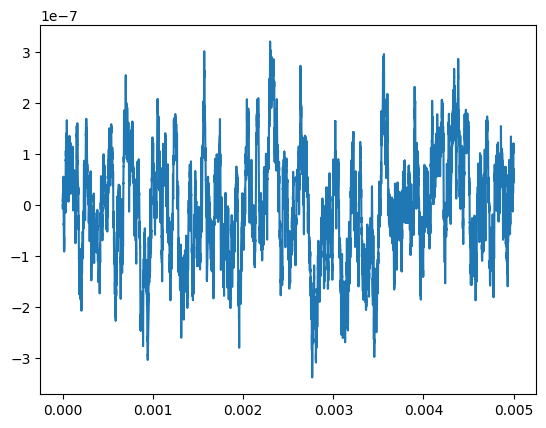

In [28]:
x0 = 0 #(dt)*np.sqrt(2 * kB * T * gamma_hz * m) * np.random.normal() * np.sqrt(dt) / m
v0 = 0 #np.sqrt(2 * kB * T * gamma_hz * m) * np.random.normal() * np.sqrt(dt) / m
positions,velocities = runge_kutta(v0,x0)
plt.plot(t,positions)

In [29]:
freq = np.sqrt(k_spring/m)
var_X = (kB*T/(m*freq**2))
print(var_X,np.var(positions)) #teste de consistência pelo teorema de equipartição

1.2708545809304747e-14 1.1284294842041885e-14
